In [226]:
import keras
from keras.datasets import fashion_mnist

In [227]:
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

In [228]:
train_data.shape

(60000, 28, 28)

In [229]:
train_labels.shape

(60000,)

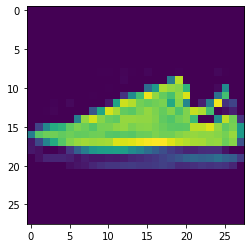

In [230]:
import matplotlib.pyplot as plt
%matplotlib inline
image = train_data[6]
plt.imshow(image)

In [231]:
train_labels[6] #According to the keras website, 7 is a label for sneaker

7

In [232]:
x_train = train_data.reshape(train_data.shape[0],28,28,1) # reshaping the data to create a third dimension for colour
x_test = test_data.reshape(test_data.shape[0],28,28,1)

In [233]:
y_train =keras.utils.to_categorical(train_labels, 10) #one hot encoding label data
y_test =keras.utils.to_categorical(test_labels, 10)

In [234]:
x_train = x_train.astype('float32')/np.max(train_data)
x_test = x_test.astype('float32')/np.max(train_data)

In [211]:
from keras import models,layers
model = models.Sequential()

In [212]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)             

In [213]:
model.compile(optimizer='rmsprop',
              metrics= ['accuracy'] ,
              loss = 'categorical_crossentropy' )

In [214]:
history = model.fit(x_train,y_train,
                     epochs=10, 
                    batch_size = 512,)

Epoch 1/10
118/118 [==============================] - 14s 122ms/step - loss: 0.8678 - accuracy: 0.6812
Epoch 2/10
118/118 [==============================] - 15s 124ms/step - loss: 0.5174 - accuracy: 0.8055
Epoch 3/10
118/118 [==============================] - 17s 144ms/step - loss: 0.4202 - accuracy: 0.8462
Epoch 4/10
118/118 [==============================] - 19s 164ms/step - loss: 0.3676 - accuracy: 0.8649
Epoch 5/10
118/118 [==============================] - 19s 163ms/step - loss: 0.3316 - accuracy: 0.8782
Epoch 6/10
118/118 [==============================] - 20s 165ms/step - loss: 0.3038 - accuracy: 0.8891
Epoch 7/10
118/118 [==============================] - 19s 161ms/step - loss: 0.2844 - accuracy: 0.8952
Epoch 8/10
118/118 [==============================] - 19s 164ms/step - loss: 0.2674 - accuracy: 0.9019
Epoch 9/10
118/118 [==============================] - 19s 164ms/step - loss: 0.2507 - accuracy: 0.9071
Epoch 10/10
118/118 [==============================] - 19s 164ms/step - l

In [242]:
score = model.predict(x_test[:5])
np.argmax(score[0])

9

In [243]:
np.argmax(y_test[0])

9

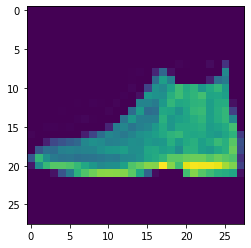

In [246]:
plt.imshow(test_data[0])
plt.savefig('Ankle_boot.png')